In [4]:
import os, sys, math
from scipy.stats import binom, norm, chi2, uniform, kstwobign, multinomial, chisquare
import matplotlib.pyplot as plt 
import numpy as np

sys.path.insert(1, "../../python")
from stats import binomial_as_normal_dist, multinomial_as_chi2_dist

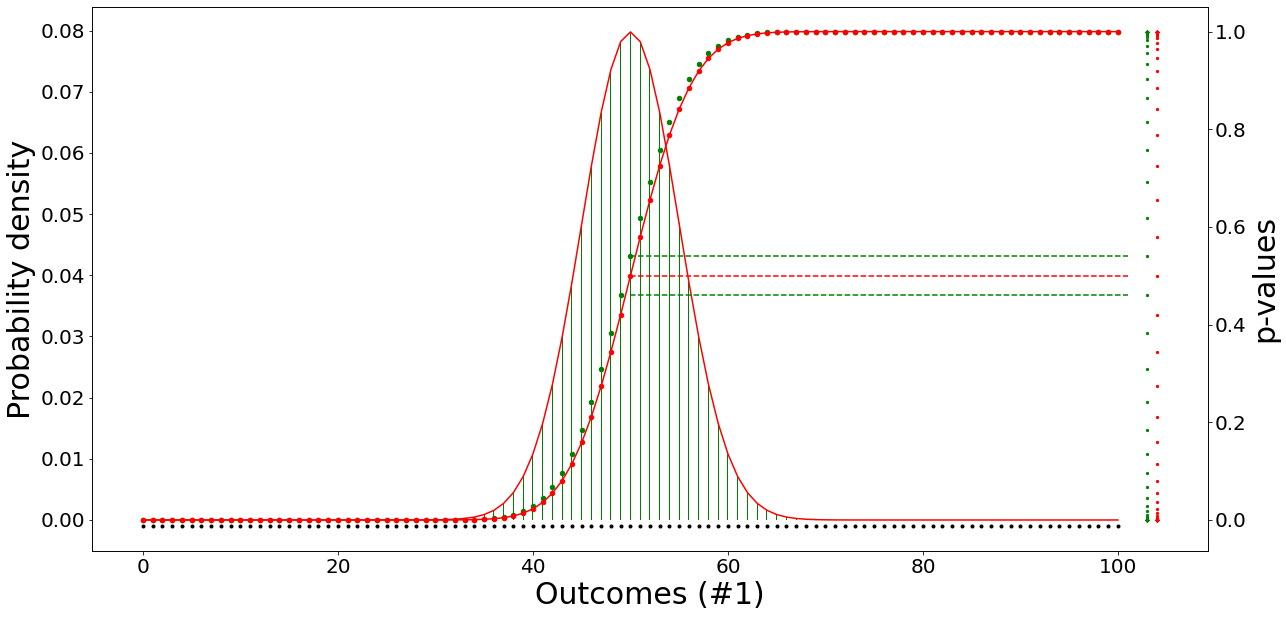

In [5]:
normal_binom = binomial_as_normal_dist(n=100, p=0.5)
s = 80
x = normal_binom['x']
maxx = max(x)
maxy = max(normal_binom['binom_pmf'])
n = len(x)


font_size = 30
tick_size = 20
text_size = 15
binom_color = 'g'
norm_color = 'r'

fig, ax1 = plt.subplots(1, figsize=(20, 10)) 
ax1.bar(x, normal_binom['binom_pmf'], width= 0.1, color = binom_color) 
ax1.plot(x, normal_binom['norm_pdf'], color = norm_color)
ax1.scatter(x, [-0.001]*n, color = 'black', marker='.')


ax2 = ax1.twinx() 

ax2.scatter(x, normal_binom['binom_cdf'], color = binom_color, marker='.', s = s) 
ax2.plot(x, normal_binom['norm_cdf'], color = norm_color) 
ax2.scatter(x, normal_binom['norm_cdf'], color = norm_color, marker='.', s = s) 
ax2.scatter([maxx+3]*n, normal_binom['binom_cdf'], color = binom_color, marker='.', s = 20) 
ax2.scatter([maxx+4]*n, normal_binom['norm_cdf'], color = norm_color, marker='.', s = 20) 
ax2.hlines(xmin=n//2, xmax=n,y=normal_binom['binom_cdf'][n//2], color=binom_color, linestyles='--')
ax2.hlines(xmin=n//2, xmax=n,y=normal_binom['binom_cdf'][n//2-1], color=binom_color, linestyles='--')
ax2.hlines(xmin=n//2, xmax=n,y=normal_binom['norm_cdf'][n//2], color=norm_color, linestyles='--')

ax1_ylims = ax1.axes.get_ylim()           # Find y-axis limits set by the plotter
ax1_yratio = ax1_ylims[0] / ax1_ylims[1]  # Calculate ratio of lowest limit to highest limit

ax2_ylims = ax2.axes.get_ylim()           # Find y-axis limits set by the plotter
ax2_yratio = ax2_ylims[0] / ax2_ylims[1]  # Calculate ratio of lowest limit to highest limit


if ax1_yratio < ax2_yratio: 
    ax2.set_ylim(bottom = ax2_ylims[1]*ax1_yratio)
else:
    ax1.set_ylim(bottom = ax1_ylims[1]*ax2_yratio)
ax1.xaxis.set_tick_params(labelsize=tick_size)
ax1.yaxis.set_tick_params(labelsize=tick_size)
ax2.xaxis.set_tick_params(labelsize=tick_size)
ax2.yaxis.set_tick_params(labelsize=tick_size)

ax1.set_xlabel(r"Outcomes (#1)", fontsize=font_size)
ax1.set_ylabel("Probability density", fontsize=font_size)
ax2.set_ylabel("p-values", fontsize=font_size)
# plt.tight_layout()
plt.savefig('Binomial_vs_normal.png')
plt.show()

sum from cdf= 1.0000000000000013, sum using pmf= 1.0000000000000013
89.20579738299378


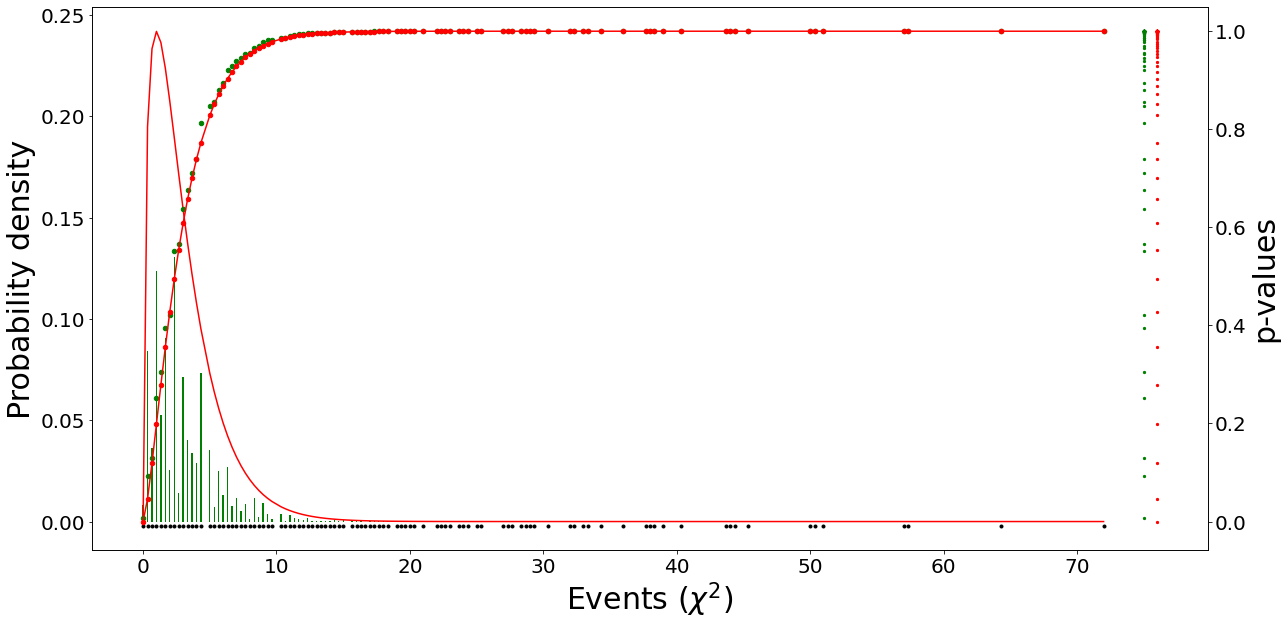

In [7]:
chi2_multinom = multinomial_as_chi2_dist(n = 24, k=4)
print(f"sum from cdf= {chi2_multinom['chi2_disc_cdf'][-1]}, sum using pmf= {sum(chi2_multinom['chi2_disc_pmf'])}")
print(sum(chi2_multinom['chi2_disc_cdf']))
s = 80
x = chi2_multinom['x']
maxx = max(x)
maxy = max(chi2_multinom['chi2_disc_pmf'])
n = len(x)
   # res = {'x':x_events, 'chi2_disc_pmf':chi2_as_multinomial_pmf, 'chi2_disc_cdf':chi2_as_multinomial_cdf
            # ,'chi2_pdf': chi2_pdf, 'chi2_cdf':chi2_cdf}  
font_size = 30
tick_size = 20
text_size = 15
binom_color = 'g'
norm_color = 'r'
# chi2_multinom[]
fig, ax1 = plt.subplots(1, figsize=(20, 10)) 
ax1.bar(x, chi2_multinom['chi2_disc_pmf'], width= 0.1, color = binom_color) 
ax1.plot(x, chi2_multinom['chi2_pdf'], color = norm_color)
ax1.scatter(x, [-0.002]*n, color = 'black', marker='.')

ax2 = ax1.twinx() 
ax2.scatter(x, chi2_multinom['chi2_disc_cdf'], color = binom_color, marker='.', s = s) 
ax2.plot(x, chi2_multinom['chi2_cdf'], color = norm_color) 
ax2.scatter(x, chi2_multinom['chi2_cdf'], color = norm_color, marker='.', s = s) 
ax2.scatter([maxx+3]*n, chi2_multinom['chi2_disc_cdf'], color = binom_color, marker='.', s = 20) 
ax2.scatter([maxx+4]*n, chi2_multinom['chi2_cdf'], color = norm_color, marker='.', s = 20) 
# ax2.hlines(xmin=n//2, xmax=n,y=chi2_multinom['chi2_disc_cdf'][n//2], color=binom_color, linestyles='--')
# ax2.hlines(xmin=n//2, xmax=n,y=chi2_multinom['chi2_disc_cdf'][n//2-1], color=binom_color, linestyles='--')
# ax2.hlines(xmin=n//2, xmax=n,y=chi2_multinom['chi2_cdf'][n//2], color=norm_color, linestyles='--')



ax1_ylims = ax1.axes.get_ylim()           # Find y-axis limits set by the plotter
ax1_yratio = ax1_ylims[0] / ax1_ylims[1]  # Calculate ratio of lowest limit to highest limit

ax2_ylims = ax2.axes.get_ylim()           # Find y-axis limits set by the plotter
ax2_yratio = ax2_ylims[0] / ax2_ylims[1]  # Calculate ratio of lowest limit to highest limit
# ax1.set_ylim(-0.003, maxy*1.1)

if ax1_yratio < ax2_yratio: 
    ax2.set_ylim(bottom = ax2_ylims[1]*ax1_yratio)
else:
    ax1.set_ylim(bottom = ax1_ylims[1]*ax2_yratio)
ax1.xaxis.set_tick_params(labelsize=tick_size)
ax1.yaxis.set_tick_params(labelsize=tick_size)
ax2.xaxis.set_tick_params(labelsize=tick_size)
ax2.yaxis.set_tick_params(labelsize=tick_size)

ax1.set_xlabel(r"Events ($\chi^2$)", fontsize=font_size)
ax1.set_ylabel("Probability density", fontsize=font_size)
ax2.set_ylabel("p-values", fontsize=font_size)
# plt.tight_layout()
plt.savefig('Multinomial_vs_chi2.png')
plt.show()